## Import Dependencies


In [21]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import io
import requests

### Obtain Training and Testing CSV

In [54]:
# Make sure to copy full file path of the CSV files

training = pd.read_csv(r'/Users/ericsun02/Documents/UCD Classes/23-24/Winter Q/141C/Final_Proj/Disease-Prediction/Training.csv')
test = pd.read_csv(r'/Users/ericsun02/Documents/UCD Classes/23-24/Winter Q/141C/Final_Proj/Disease-Prediction/Testing.csv')

In [55]:
# Classes to Predict

len(training['prognosis'].unique())

41

### Check for NAs, Missing Data, Summaries

In [56]:
training.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [57]:
# Check for Null Values in Training Set

training.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [58]:
# Check for Null Values in Test Set

test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

### Clean Data for Feature Selection

In [ ]:
training = training.drop(columns = "Unnamed: 133")

In [44]:
training.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

### Feature Selection

In [ ]:
###

In [ ]:
###

### Splitting Train and Test

In [49]:
x_train = training.drop(['prognosis'], axis = 1)
y_train = training['prognosis']
x_test = test.drop(['prognosis'], axis = 1)
y_test = test['prognosis']

In [59]:
print(x_train)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [50]:
# Second coordinate of X_train should match with X_test

print(x_train.shape)

(4920, 132)


In [51]:
print(x_test.shape)

(42, 132)


In [52]:
print(len(test['prognosis'].unique()))

41


#### Encoding Response Variable

In [60]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [71]:
y_test = le.fit_transform(y_test)

In [113]:
# Should be equal to number of response categories

len(np.unique(y_train))

41

### Random Forest Classifier

In [114]:
# From SKLEARN
from collections import OrderedDict

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=1,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=2,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=3,
        ),
    ),
]

In [115]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimat

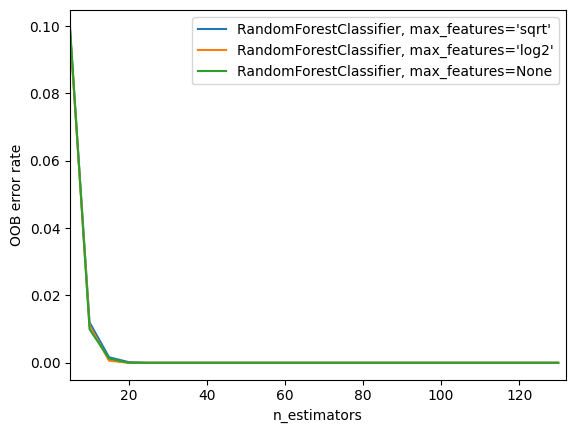

In [116]:
# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = len(x_train.columns)

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### Models

In [104]:
# 3 models for varying amount of predictors to split tree on

# m=p
rf = RandomForestClassifier(n_estimators = len(x_train.columns), oob_score=True, random_state = 1)
rf.fit(x_train, y_train)

# m=p/2
rf2 = RandomForestClassifier(n_estimators = int(len(x_train.columns) / 2), random_state = 2)
rf2.fit(x_train, y_train)

# m=sqrt(p)
rf3 = RandomForestClassifier(n_estimators = int(round(np.sqrt(len(x_train.columns)), 0)), random_state = 3)
rf3.fit(x_train, y_train)

RandomForestClassifier(n_estimators=11, random_state=3)

In [96]:
# Use model to predict type of prognosis (Y) on unseen values of symptoms (X)

rf_predictions = rf.predict(x_test)
rf2_predictions = rf2.predict(x_test)
rf3_predictions = rf3.predict(x_test)

# Should be equal to x_test, x-coord
print(len(rf_predictions))
print(len(rf2_predictions))
print(len(rf3_predictions))

42
42
42


#### Metrics and Performance Evaluation

In [105]:
rf.oob_score_

1.0

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report

mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.16666666666666666
Mean Squared Error: 1.1666666666666667
R-squared: 0.9914995559777783


In [98]:
mae2 = mean_absolute_error(y_test, rf2_predictions)
mse2 = mean_squared_error(y_test, rf2_predictions)
r2_2 = r2_score(y_test, rf2_predictions)

print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("R-squared:", r2_2)

Mean Absolute Error: 0.16666666666666666
Mean Squared Error: 1.1666666666666667
R-squared: 0.9914995559777783


In [99]:
mae3 = mean_absolute_error(y_test, rf3_predictions)
mse3 = mean_squared_error(y_test, rf3_predictions)
r2_3 = r2_score(y_test, rf3_predictions)

print("Mean Absolute Error:", mae3)
print("Mean Squared Error:", mse3)
print("R-squared:", r2_3)

Mean Absolute Error: 0.16666666666666666
Mean Squared Error: 1.1666666666666667
R-squared: 0.9914995559777783


In [81]:
report = classification_report(y_test, rf_predictions, output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,1.00000
1,1.000000,1.000000,1.000000,1.00000
2,1.000000,1.000000,1.000000,1.00000
3,1.000000,1.000000,1.000000,1.00000
4,1.000000,1.000000,1.000000,1.00000
5,1.000000,1.000000,1.000000,1.00000
6,1.000000,1.000000,1.000000,1.00000
7,1.000000,1.000000,1.000000,1.00000
8,0.500000,1.000000,0.666667,1.00000
9,1.000000,1.000000,1.000000,1.00000
